# Machine Learning Coursework 2 

## Subtask 1 

#### Clustering a dataset with 450 data points and 2 features using K-means and Gaussian Mixture Models (GMMs) and then comparing the result.

In [1]:
#importing relevant modules for the task 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
#Loading the dataset
df_cluster = pd.read_csv('cluster1.csv')
#Viewing the structure and the desriptive stats of the data
df_cluster.describe()

,-0.2332,1.178
count,449.000000,449.000000
mean,1.065961,-0.196845
std,1.550842,0.518966
min,-1.882200,-2.162500
25%,-0.054482,-0.548630
50%,0.213900,-0.211160
75%,2.580300,0.059741
max,4.836900,2.381300


In [3]:
# Extract features
X = df_cluster.values

#### K-means Clustering.

C:\Users\ndoro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


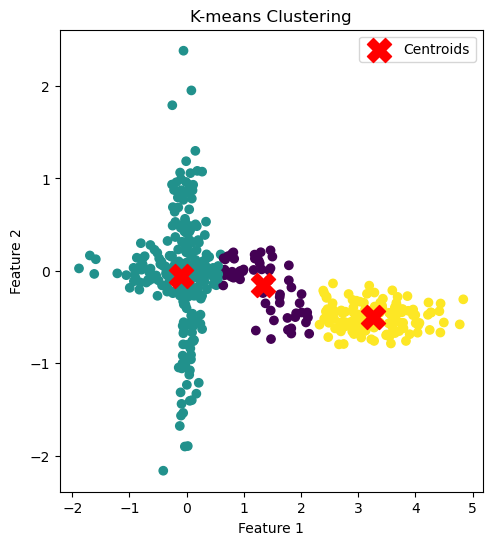

In [4]:
# K-means clustering for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Plotting K-means clusters and visualising it as a plot 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


#### Gaussian Mixture Model (GMM) Clustering

C:\Users\ndoro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


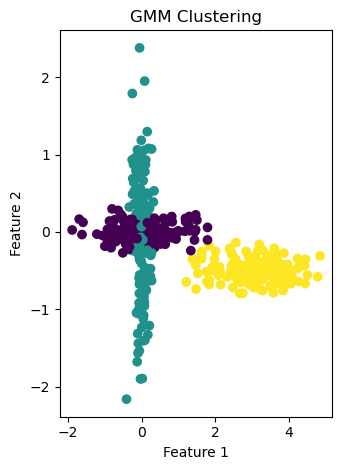

In [5]:
# GMM clustering for 3 clusters 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X)

# Plotting GMM clusters and visualing it as a plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', marker='o')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


K-means and Gaussian Mixture Model (GMM) were used to create 3 clusters from the data. K-means provides rigid clustering based on distances from centroids, resulting in spherical clusters. In contrast, GMM offers more flexibility by using probabilities, leading to elliptical clusters. GMM's ability to capture overlap, such as between the blue and purlple clusters, indicates its better handling of high variance and range in the data. Thus, GMM is better suited for this dataset with significant variance.

# Subtask 3

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('winequality-red-reduced.csv')


#### PCA on non-scaled data

In [7]:
from sklearn.decomposition import SparsePCA

# Initialize Sparse PCA with 3 components and alpha = 5
sparse_pca = SparsePCA(n_components=3, alpha=5)
sparse_pca.fit(data)

# Print the components
print("Components for raw data:")
print(sparse_pca.components_)


Components for raw data:
[[ 0.          0.          0.          0.          0.99999587  0.
   0.          0.         -0.0028738 ]
 [ 0.          0.          0.          1.          0.          0.
   0.          0.          0.        ]
 [ 0.99999353  0.          0.00359734  0.          0.          0.
   0.          0.          0.        ]]


3 components show up

#### Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


#### PCA on scaled data

In [9]:
# Initialize Sparse PCA with 3 components and alpha = 5 for scaled data
sparse_pca_scaled = SparsePCA(n_components=3, alpha=5)
sparse_pca_scaled.fit(scaled_data)

# Print the components
print("Components for scaled data:")
print(sparse_pca_scaled.components_)


Components for scaled data:
[[ 0.54175021 -0.29802658  0.52629844  0.          0.          0.30842943
  -0.45963601  0.18521027  0.        ]
 [ 0.          0.          0.          0.70710678  0.70710678  0.
   0.          0.          0.        ]
 [ 0.         -0.3921877   0.0984998   0.          0.         -0.53151031
   0.          0.          0.7443006 ]]


The Sparse PCA results differ between raw and scaled data because scaling changes how features contribute to the analysis. In raw data, features with larger numerical ranges, like density and alcohol content, can dominate the results and obscure the true patterns. This can make it harder to see the relationships between the data.

Scaling the data (to have a mean of 0 and variance of 1) means that the impact of all features can be better seen. This means each feature has an equal impact on the components, making it easier to see the more possible relationships. 

The components from the scaled data give a better representation of these relationships. They show a mix of features (demonstatrated by more values showing up)that fit with the suggested variables, such as acidity, sulfur dioxide, and alcohol content. This supports using these latent variables in your model, as the scaled data provides a more accurate and insightful view of how the features interact.

# Subtask 4

#### Creating a proof-of-concept system for detecting fraudulent payments 

In this project, we are tasked with building a proof-of-concept system to detect fraudulent credit card transactions using a Random Forest classifier. The dataset provided contains detailed information about transactions, including anonymized features and a label indicating whether a transaction was fraudulent. The aim is to create a model that can predict fraud accurately and handle both genuine and fraudulent transactions effectively. Below, is the detailed process followed in developing and evaluating this system(He & Garcia, 2009).



#### Importing relevant modules.

In [10]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.shape 

(284807, 31)

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Demonstratig no missing values.

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Preparing data

In [16]:
# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']



The process began by loading the dataset into a pandas DataFrame, which is a standard practice for handling data in Python. The dataset consists of various features related to credit card transactions, with the target variable Class indicating whether a transaction is fraudulent or not. Then separated the features (X) from the target variable (y) to prepare for model training.

#### Feature scaling

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler was used to standardize the features, making them have a mean of 0 and a standard deviation of 1. This made sure that all features would be considered in the training of the model(Dong et al., 2020).

#### Handling Class Imbalance

In [17]:
# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


Credit card fraud datasets are typically imbalanced, meaning there are far fewer fraudulent transactions compared to non-fraudulent ones. To address this imbalance, SMOTE was used (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic examples for the minority class (fraudulent transactions) to balance the dataset, which helps the model to better learn from the minority class and improves its predictive performance (Chawla et al., 2002).

#### Splitting the Data

In [18]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Splitting into training (80%) and training (20%). To allow for fair testing of the model later on.

#### Training the Random Forest Classifier

In [19]:
# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

To build a robust model, a Random Forest classifier was trained, which is known for its robustness and accuracy in handling complex datasets like the one given.GridSearchCV was used for hyperparameter tuning to find the optimal settings for the model. This process involved testing different combinations of hyperparameters such as the number of trees (n_estimators), the maximum depth of trees (max_depth), and the minimum number of samples required to split a node (min_samples_split). This helps in optimizing the model’s performance for more accurate results  (He & Garcia, 2009; Dong et al., 2020).

#### Evaluating the Model

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")


[[56741     9]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.999920704845815


The confusion matrix reveals the number of true positives, true negatives, false positives, and false negatives, providing insight into how well the model differentiates between fraudulent and non-fraudulent transactions.

The classification report offers precision, recall, and F1-score, indicating the accuracy and balance of the model's predictions. Precision shows the correctness of positive predictions, recall measures the model's ability to find all actual positives, and the F1-score balances these two aspects.

The ROC-AUC score reflects the model's ability to distinguish between classes, with a score close to 1 demonstrating strong performance.

In summary, the Random Forest model shows high accuracy (shown by the ROC-AUC score of 0.999) and effective classification of both fraudulent and genuine transactions.

(He & Garcia, 2009; Dong et al., 2020)

#### Summary

The Random Forest classifier proved to be a robust solution for detecting fraudulent credit card transactions. By addressing class imbalance with SMOTE, scaling features, and tuning hyperparameters, a model was developed, that accurately identifies both fraudulent and non-fraudulent transactions. The model's performance was validated through various metrics, demonstrating its potential effectiveness in a real-world scenario.

#### References

Chawla, N.V., Bowyer, K.W., Hall, L.O. & Kegelmeyer, W.P., 2002. SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, pp.321-357.

Dong, X., Yu, Z., Cao, W., Shi, Y. & Ma, Q., 2020. A survey on ensemble learning. Frontiers of Computer Science, 14, pp.241-258.

He, H. & Garcia, E.A., 2009. Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering, 21(9), pp.1263-1284.

